Universidad de Guanajuato, División de Ciencias e Ingenierías

Mecanica Analitica 

Muñoz López Fabián (munozlf2016@licifug.ugto.mx)

Tarea $2$

La ecuación del péndulo forzado amortiguado es:

$\ddot{\theta} + \mu \dot{\theta} + \omega_{0}^{2} \sin{\theta} = A \cos{\omega_{d} t}$

$1.-$ Límite lineal. Considerando ángulos pequeños, tenemos la ecuación lineal forzada y amortiguada vista en clase, cuya solución particular (aquella que domina a tiempos grandes) tiene una función Coseno con una cierta amplitud y fase dada en términos de los parametros de la ecuación anterior. Tomando: $A = 1$, $\omega_{0}= 1$ y $\mu = .05$

a) Graficar la Amplitud como función de la frecuencia de la fuerza externa. ¿Exista alguna resonancia?

Considerando solo la solicion particular $\theta_{(t)} =  \dfrac{A}{((\omega_{0}^{2} - \omega^{2})^2 + 4\beta^{2} \omega^{2})^{1/2}} \cos{(\omega t - \delta) }$ , se grafica la amplitud variando $\omega$:

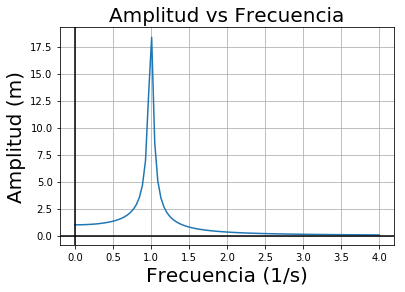

In [46]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
import numpy as np
import sympy
from  scipy import integrate

# condiciones iniciales, consideramos unicamente solición particular
A = 1
w_0 = 1
mu = .05

# Amplitud como funcion de W, usando la solucion particular
def f1(w):
    A_w = A/(np.sqrt(((w_0**2)-(w**2))**2+(w*mu)**2))
    return A_w

# Valores que toma w, para realizar el grafico
w = np.linspace(0,4,100)

# Graficar función.
pyplot.plot(w, [f1(i) for i in w])

# Establecer el color de los ejes.
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")

# Establecer nombre a los ejes
plt.xlabel("Frecuencia (1/s)", fontsize = 20)
plt.ylabel("Amplitud (m)", fontsize = 20)
plt.title("Amplitud vs Frecuencia", fontsize = 20)

#grid() Establece la malla a True (visible) o False (oculta).
plt.grid(True)


# Guardar gráfico como imágen PNG.
pyplot.savefig("Prob1a.png")
# Mostrarlo.
pyplot.show()

b) Graficar la Fase de la solución como función de la frecuencia de la fuerza externa.

Considerando solo la solicion particular $\delta_{(w)} = \arctan{(\dfrac{ 2 \beta \omega}{\omega_{0}^{2}- \omega^{2}})}$ , se grafica la fase variando $\omega$

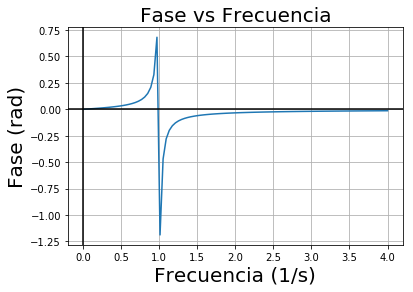

In [47]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
import numpy as np
import sympy
from  scipy import integrate

# condiciones iniciales, consideramos unicamente la solición particular
A = 1
w_0 = 1
mu = .05

# Funcion para delta
def fase(w):
    Delta = math.atan(mu*w/((w_0**2)-(w**2)))
    return Delta

# Valores que toma w, para realizar el grafico
w = np.linspace(0,4,100)

# Graficar amplitud como función de la frecunecia.
pyplot.plot(w, [fase(i) for i in w])

# Establecer el color de los ejes.
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")

# Establecer nombre a los ejes
plt.xlabel("Frecuencia (1/s)", fontsize = 20)
plt.ylabel("Fase (rad)", fontsize = 20)
plt.title("Fase vs Frecuencia", fontsize = 20)

#grid() Establece la malla a True (visible) o False (oculta).
plt.grid(True)


# Guardar gráfico como imágen PNG.
pyplot.savefig("Prob1b.png")
# Mostrarlo.
pyplot.show()

c) Graficar el ángulo y la velocidad angular como función del tiempo para $2$ condiciones iniciales distintas.

Para este caso se consiodera la solucion general $x_{g} = x_{h} + x_{p}$, que es la solucion homogenea mas la solucion particular. Teniendo $x_{p} = \theta_{(t)} =  \dfrac{A}{((\omega_{0}^{2} - \omega^{2})^2 + 4\beta^{2} \omega^{2})^{1/2}} \cos{(\omega t - \delta) }$ , y la solucion homogenea $x_{H} = \theta_{(t)} = e^{-\beta t} \cos{(w_{1}t - \delta)}$   

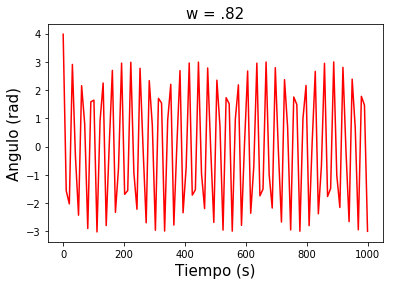

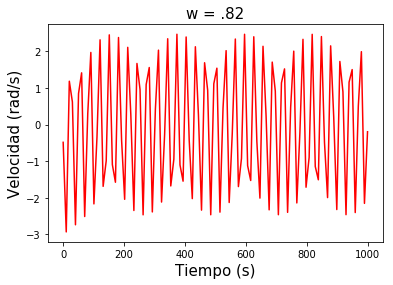

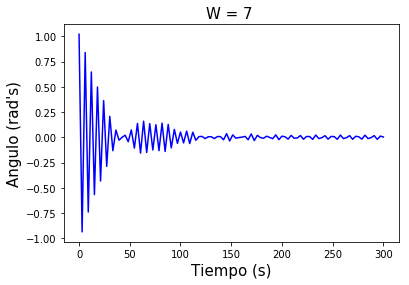

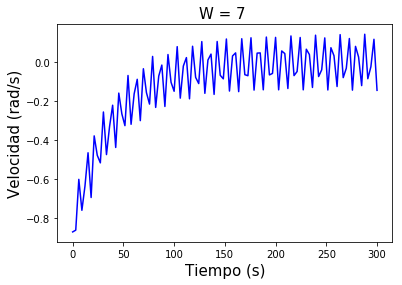

In [48]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
import numpy as np
import sympy
from  scipy import integrate

A = 1
w_0 = 1
mu = .05
# Primera condicion inicial
w_1 = .82
# Segunda conmdicion inicial
w_2 = 7

# Funcion para delta
def fase(w):
    Delta = math.atan(mu*w/((w_0**2)-(w**2)))
    return Delta

# se obtiene la frecuencia w1 a partir de condiciones iniciales
w1 = np.sqrt(w_0**2-(mu**2/4))

# Funcion para el angulo, considerando la solucion homogenea y la particular
def theta(t, w, w1, delta):
    phi = A*((1/(np.sqrt(((w_0**2)-(w**2))**2+2*(w*mu)**2))*math.cos(w*t - delta)) +np.exp(-t*mu/2)*np.cos(w1*t - delta) )
    return phi

# Funcion para la velocidad considerando la solucion homogenea y la particular
def vel(t, w, w1, delta):
    phi_punto = -A*( np.exp(-t*mu/2)*((mu/2)*np.cos(w1*t - delta) 
                + w1*np.sin(w1-delta)) + w/(np.sqrt(((w_0**2)-(w**2))**2+2*(w*mu)**2))*math.sin(w*t - delta))
    return phi_punto

# Definimos el array dimensional para t1 primera grafica
t1 = np.linspace(0, 1000, 100)

# Definimos el array dimensional para t2 segunda grafica
t2 = np.linspace(0, 300, 100)

delta1 = fase(w_1)
delta2 = fase(w_2)
# Creamos la figura
plt.figure()

# Primera grafica
plt.plot(t1, [theta(i,w_1, w1, delta1) for i in t1],'r')
# Establecer nombre a los ejes
plt.xlabel("Tiempo (s)", fontsize = 15)
plt.ylabel("Angulo (rad)", fontsize = 15)
plt.title("w = .82", fontsize = 15)

# Guardar gráfico como imágen PNG.
pyplot.savefig("Prob1c1.png")
# Mostrarlo.
pyplot.show()

# Segunda grafica
plt.plot(t1, [vel(i,w_1, w1, delta1) for i in t1],'r')
# Establecer nombre a los ejes
plt.xlabel("Tiempo (s)", fontsize = 15)
plt.ylabel("Velocidad (rad/s)", fontsize = 15)
plt.title("w = .82", fontsize = 15)

# Guardar gráfico como imágen PNG.
pyplot.savefig("Prob1c2.png")
# Mostrarlo.
pyplot.show()

# Tercera grafica
plt.plot(t2, [theta(i,w_2, w1, delta2) for i in t2],'b')
# Establecer nombre a los ejes
plt.xlabel("Tiempo (s)", fontsize = 15)
plt.ylabel("Angulo (rad's)", fontsize = 15)
plt.title("W = 7 ", fontsize = 15)

# Guardar gráfico como imágen PNG.
pyplot.savefig("Prob1c3.png")
# Mostrarlo.
pyplot.show()

# Cuarta grafica
plt.plot(t2, [vel(i,w_2, w1, delta2) for i in t2],'b')
# Establecer nombre a los ejes
plt.xlabel("Tiempo (s)", fontsize = 15)
plt.ylabel("Velocidad (rad/s)", fontsize = 15)
plt.title("W = 7 ", fontsize = 15)

# Guardar gráfico como imágen PNG.
pyplot.savefig("Prob1c4.png")
# Mostrarlo.
pyplot.show()

d) Graficar en el espacio fase las $2$ trayectorias con condiciones iniciales distintas del inciso anterior.

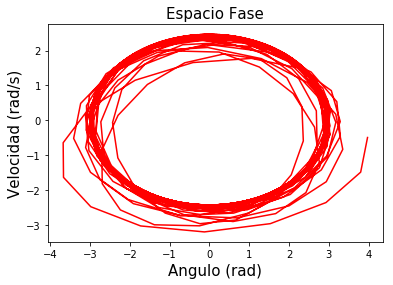

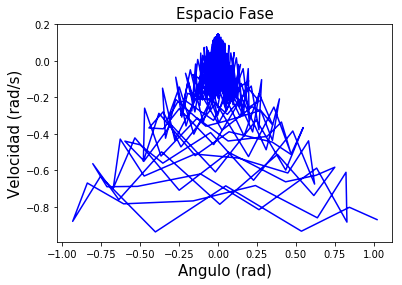

In [49]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
import numpy as np
import sympy
from  scipy import integrate

A = 1
w_0 = 1
mu = .05
# Primera condicion inicial
w_1 = .82
# Segunda conmdicion inicial
w_2 = 7


# Funcion para delta
def fase(w):
    Delta = math.atan(mu*w/((w_0**2)-(w**2)))
    return Delta

# se obtiene la frecuencia w1 a partir de condiciones iniciales
w1 = np.sqrt(w_0**2-(mu**2/4))

# Funcion para el angulo, considerando la solucion homogenea y la particular
def theta(t, w, w1, delta):
    phi = A*((1/(np.sqrt(((w_0**2)-(w**2))**2+2*(w*mu)**2))*math.cos(w*t-delta))+np.exp(-t*mu/2)*np.cos(w1*t-delta))
    return phi

# Funcion para la velocidad considerando la solucion homogenea y la particular
def vel(t, w, w1, delta):
    phi_punto = -A*( np.exp(-t*mu/2)*((mu/2)*np.cos(w1*t - delta) 
                + w1*np.sin(w1-delta)) + w/(np.sqrt(((w_0**2)-(w**2))**2+2*(w*mu)**2))*math.sin(w*t - delta))
    return phi_punto

# Definimos el array dimensional para t1 primera grafica
t = np.linspace(0, 500, 1000)

delta1 = fase(w_1)
delta2 = fase(w_2)
# Creamos la figura
plt.figure()

# Primera grafica
plt.xlabel("Angulo (rad)", fontsize = 15)
plt.ylabel("Velocidad (rad/s)", fontsize = 15)
plt.title("Espacio Fase", fontsize = 15)
plt.plot([theta(i,w_1, w1, delta1) for i in t], [vel(i, w_1, w1, delta1) for i in t],'r')

# Guardar gráfico como imágen PNG.
pyplot.savefig("Prob1d1.png")
# Mostrarlo.
pyplot.show()

# Segunda grafica
plt.xlabel("Angulo (rad)", fontsize = 15)
plt.ylabel("Velocidad (rad/s)", fontsize = 15)
plt.title("Espacio Fase", fontsize = 15)
plt.plot([theta(i, w_2, w1, delta2) for i in t], [vel(i,w_2, w1, delta2) for i in t], 'b')


# Guardar gráfico como imágen PNG.
pyplot.savefig("Prob1d2.png")
# Mostrarlo.
pyplot.show()

e) Graficar en el espacio fase $2$ trayectorias con dos A's distintas, con $\mu=0$ y la misma condición inicial.

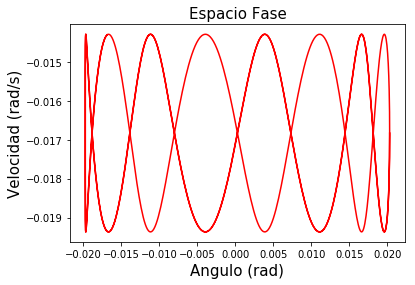

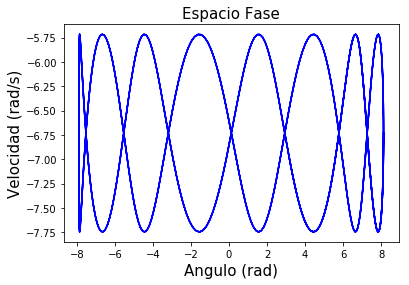

In [50]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
import numpy as np
import sympy
from  scipy import integrate

A_1 = .02
A_2 = 8
w_0 = 1
mu = 0
# Primera condicion inicial
w_1 = 8

# Funcion para delta
def fase(w):
    Delta = math.atan(mu*w/((w_0**2)-(w**2)))
    return Delta

# se obtiene la frecuencia w1 a partir de condiciones iniciales
w1 = np.sqrt(w_0**2-(mu**2/4))

# Funcion para el angulo, considerando la solucion homogenea y la particular
def theta(t, w, w1, delta, A):
    phi = A*((1/(np.sqrt(((w_0**2)-(w**2))**2+2*(w*mu)**2))*math.cos(w*t-delta))+np.exp(-t*mu/2)*np.cos(w1*t-delta))
    return phi

# Funcion para la velocidad considerando la solucion homogenea y la particular
def vel(t, w, w1, delta, A):
    phi_punto = -A*( np.exp(-t*mu/2)*((mu/2)*np.cos(w1*t - delta) 
                + w1*np.sin(w1-delta)) + w/(np.sqrt(((w_0**2)-(w**2))**2+2*(w*mu)**2))*math.sin(w*t - delta))
    return phi_punto

# Definimos el array dimensional para t1 primera grafica
t1 = np.linspace(0, 10, 1000)
t2 = np.linspace(0, 20, 1000)

delta = fase(w_1)
# Creamos la figura
plt.figure()

# Primera grafica
plt.xlabel("Angulo (rad)", fontsize = 15)
plt.ylabel("Velocidad (rad/s)", fontsize = 15)
plt.title("Espacio Fase", fontsize = 15)
plt.plot([theta(i, w_1, w1, delta, A_1) for i in t1], [vel(i, w_1, w1, delta, A_1) for i in t1],'r')

# Guardar grafico como imágen PNG.
pyplot.savefig("Prob1e1.png")
# Mostrarlo.
pyplot.show()

# Segunda grafica
plt.xlabel("Angulo (rad)", fontsize = 15)
plt.ylabel("Velocidad (rad/s)", fontsize = 15)
plt.title("Espacio Fase", fontsize = 15)
plt.plot([theta(i, w_1, w1, delta, A_2) for i in t2], [vel(i,w_1, w1, delta, A_2) for i in t2],'b')

# Guardar grafico como imágen PNG.
pyplot.savefig("Prob1e2.png")
# Mostrarlo.
pyplot.show()

f) Graficar en el espacio fase $2$ trayectorias con $\mu = 0, 2.0, 0.1$  , para la misma amplitud ($A=1$) y la misma condición inicial.

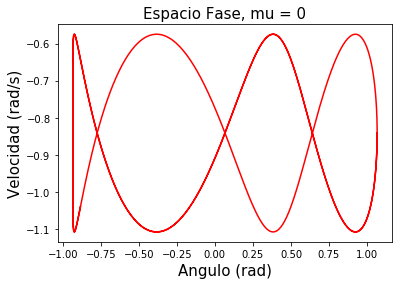

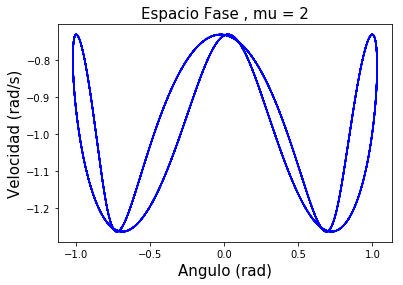

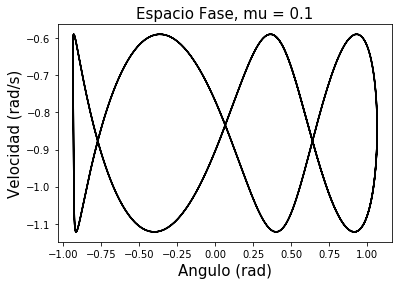

In [53]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
import numpy as np
import sympy
from  scipy import integrate

A_1 = 1
w_0 = 1
mu_1 = 0
mu_2 = 2
mu_3 = 0.1
# Primera condicion inicial
w_1 = 4

# Funcion para delta
def fase(w,mu):
    Delta = math.atan(mu*w/((w_0**2)-(w**2)))
    return Delta

# se obtiene la frecuencia w1 a partir de condiciones iniciales
w1 = np.sqrt(w_0**2-(mu**2/4))

# Funcion para el angulo, considerando la solucion homogenea y la particular
def theta(t, w, w1, delta, A):
    phi = A*((1/(np.sqrt(((w_0**2)-(w**2))**2+2*(w*mu)**2))*math.cos(w*t-delta))+np.exp(-t*mu/2)*np.cos(w1*t-delta))
    return phi

# Funcion para la velocidad considerando la solucion homogenea y la particular
def vel(t, w, w1, delta, A):
    phi_punto = -A*( np.exp(-t*mu/2)*((mu/2)*np.cos(w1*t - delta) 
                + w1*np.sin(w1-delta)) + w/(np.sqrt(((w_0**2)-(w**2))**2+2*(w*mu)**2))*math.sin(w*t - delta))
    return phi_punto

# Definimos el array dimensional para t1 primera grafica
t1 = np.linspace(0, 10, 1000)
t2 = np.linspace(0, 50, 1000)
t3 = np.linspace(0, 20, 1000)

# Calculo de Delta
delta1 = fase(w_1,mu_1)
delta2 = fase(w_1,mu_2)
delta3 = fase(w_1,mu_3)

# Creamos la figura
plt.figure()

# Primera grafica
plt.xlabel("Angulo (rad)", fontsize = 15)
plt.ylabel("Velocidad (rad/s)", fontsize = 15)
plt.title("Espacio Fase, mu = 0", fontsize = 15)
plt.plot([theta(i, w_1, w1, delta1, A_1) for i in t1], [vel(i, w_1, w1, delta1, A_1) for i in t1],'r')

# Guardar grafico como imágen PNG.
pyplot.savefig("Prob1f1.png")
# Mostrarlo.
pyplot.show()

# Segunda grafica
plt.xlabel("Angulo (rad)", fontsize = 15)
plt.ylabel("Velocidad (rad/s)", fontsize = 15)
plt.title("Espacio Fase , mu = 2", fontsize = 15)
plt.plot([theta(i, w_1, w1, delta2, A_1) for i in t2], [vel(i, w_1, w1, delta2, A_1) for i in t2], 'b')

# Guardar grafico como imágen PNG.
pyplot.savefig("Prob1f2.png")
# Mostrarlo.
pyplot.show()

# Tercera grafica
plt.xlabel("Angulo (rad)", fontsize = 15)
plt.ylabel("Velocidad (rad/s)", fontsize = 15)
plt.title("Espacio Fase, mu = 0.1", fontsize = 15)

plt.plot([theta(i, w_1, w1, delta3, A_1) for i in t3], [vel(i, w_1, w1, delta3, A_1) for i in t3], 'black')

# Guardar grafico como imágen PNG.
pyplot.savefig("Prob1f3.png")
# Mostrarlo.
pyplot.show()

$2.-$ Ecuación no lineal no forzada sin amortiguamiento.

a) Para un ángulo inicial de $70^{\circ}$ en reposo y una frecuencia natural unitaria, realiza una gráfica donde compares la solucion numérica del ángulo y su velocidad con aquella de la ecuación lineal usando las mismas condiciones iniciales.

In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
import numpy as np
import sympy
from  scipy import integrate

A_1 = 1
w_0 = 1
mu_1 = 0
mu_2 = 2
mu_3 = 0.1
# Primera condicion inicial
w_1 = 4

# Funcion para delta
def fase(w,mu):
    Delta = math.atan(mu*w/((w_0**2)-(w**2)))
    return Delta

# se obtiene la frecuencia w1 a partir de condiciones iniciales
w1 = np.sqrt(w_0**2-(mu**2/4))

# Funcion para el angulo, considerando la solucion homogenea y la particular
def theta(t, w, w1, delta, A):
    phi = A*((1/(np.sqrt(((w_0**2)-(w**2))**2+2*(w*mu)**2))*math.cos(w*t-delta))+np.exp(-t*mu/2)*np.cos(w1*t-delta))
    return phi

# Funcion para la velocidad considerando la solucion homogenea y la particular
def vel(t, w, w1, delta, A):
    phi_punto = -A*( np.exp(-t*mu/2)*((mu/2)*np.cos(w1*t - delta) 
                + w1*np.sin(w1-delta)) + w/(np.sqrt(((w_0**2)-(w**2))**2+2*(w*mu)**2))*math.sin(w*t - delta))
    return phi_punto

# Definimos el array dimensional para t1 primera grafica
t1 = np.linspace(0, 10, 1000)
t2 = np.linspace(0, 50, 1000)
t3 = np.linspace(0, 20, 1000)

# Calculo de Delta
delta1 = fase(w_1,mu_1)
delta2 = fase(w_1,mu_2)
delta3 = fase(w_1,mu_3)

# Creamos la figura
plt.figure()

# Primera grafica
plt.xlabel("Angulo (rad)", fontsize = 15)
plt.ylabel("Velocidad (rad/s)", fontsize = 15)
plt.title("Espacio Fase, mu = 0", fontsize = 15)
plt.plot([theta(i, w_1, w1, delta1, A_1) for i in t1], [vel(i, w_1, w1, delta1, A_1) for i in t1],'r')

# Guardar grafico como imágen PNG.
pyplot.savefig("Prob1f1.png")
# Mostrarlo.
pyplot.show()

b) Construye el espacio fase para una frecuencia natural unitaria, usando trayectorias que partan del reposo con un ángulo inicial que vaya de $-90^{\circ}$ a $90^{\circ}$, en intervalos de $10^{\circ}$. Suma dos trayectorias que den vueltas, una encontra de las manecillas del reloj y otra a favor.

$3.-$ Ecuación no lineal amortiguada no forzada.

a) Utiliza un parametro de amortiguamiento de $0.02$, la frecuencia natural unitaria y observa cómo el espacio fase se distorciona. Compara cada trayectoria del inciso b) del ejercio anterior con este caso amortiguado.

$4.-$ Ecuación no lineal completa.

a) Usando $\mu = 3\pi/2$, $\omega = 2\pi$, $\omega_{0}= 3\pi$ , grafica la solución para cinco casos de $A$ alrededor de $1.05$. Qué pasa con las soluciones. ¿Qué ocurre si $A=2$?

b) Obten las trayectorias en el espacio fase de los casos del inciso anterior.

BONUS

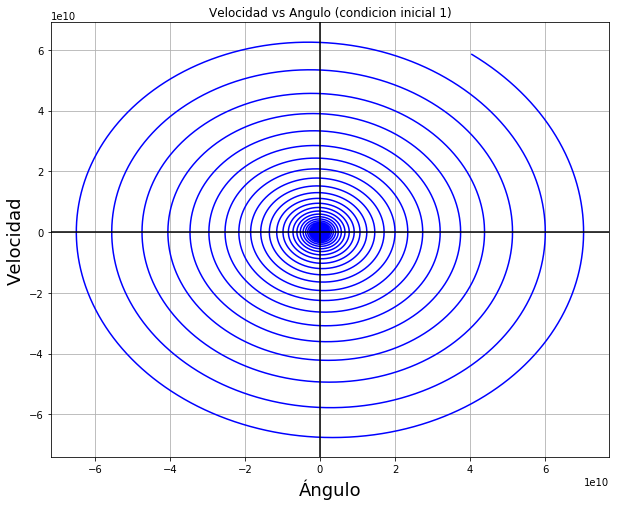

In [52]:
import matplotlib. pyplot as plt
from matplotlib import pyplot
import numpy as np
import math
from scipy.integrate import odeint

t = np.arange(-1000,1000,0.001)                              

def x(t):                                                #Definimos la funcion para el angulo
    return (20 + np.exp(-0.025*t))*np.cos(t)

def y(t):                                                #Definimos la funcion para la velocidad
    return -(20 + np.exp(-0.025*t))*np.sin(t) - 0.025*np.exp(-0.025*t)*np.cos(t)

plt.figure(figsize=(10,8))
plt.plot(x(t) , y(t), color = "blue", label="$\omega$ = 1")
plt.title("Velocidad vs Angulo (condicion inicial 1)")
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
plt.grid()
plt.ylabel("Velocidad",fontsize = 18)
plt.xlabel("Ángulo", fontsize = 18)

plt.show()